# Schwarzschild null geodesics: elliptic integrals

This [Jupyter/SageMath](https://www.sagemath.org/) notebook is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

To run it, you must start SageMath with `sage -n jupyter`.

In [1]:
version()

'SageMath version 9.1.beta1, Release Date: 2020-01-21'

In [2]:
%display latex

## Function $\Phi_b(u)$

We evaluate $\Phi_b(u)$ via the functions [elliptic_f](https://doc.sagemath.org/html/en/reference/functions/sage/functions/special.html?highlight=elliptic_f#sage.functions.special.EllipticF) and [elliptic_kc](https://doc.sagemath.org/html/en/reference/functions/sage/functions/special.html?highlight=elliptic_f#sage.functions.special.EllipticKC) of SageMath, taking into account that the second argument of `elliptic_f` and the argument of `elliptic_kc` is $m = k^2$ and not $k$.

In [3]:
def Phi(u, b):
    u = RDF(u)
    b = RDF(b)
    bc = RDF(3*sqrt(3))
    if b > bc: 
        xi = 2*arcsin(bc/b)/3
        un = RDF(1/3*cos(xi + 2*pi/3) + 1/6)
        up = RDF(1/3*cos(xi + 4*pi/3) + 1/6)
        ua = RDF(1/3*cos(xi) + 1/6)
        k2 = (up - un)/(ua - un)
        phi = arcsin(sqrt((u - un)/(up - un)))
        # NB: elliptic_kc() and elliptic_f() takes m=k^2 as argument
        aa = elliptic_kc(k2) - elliptic_f(phi, k2)
        return sqrt(2/(ua - un)) * aa
    else:
        xi = bc/b - sqrt((bc/b)^2 - 1)
        un = (1 - xi^(2/3) - xi^(-2/3))/6
        us = sqrt(un*(3*un - 1)) + un
        k2 = (us - 2.5*un + 0.25)/(2*(us - un))
        phi = arccos(abs(us - u)/(us + u - 2*un))
        # NB: elliptic_kc() take m=k^2 as argument
        aa = elliptic_kc(k2) - elliptic_f(phi, k2)
        if u > us:
            aa = - aa
        return aa / sqrt(2*(us - un))            

## Case $b > b_{\rm c}$

In [4]:
def u_p(b):
    b = RDF(b)
    bc = RDF(3*sqrt(3))
    xi = 2*arcsin(bc/b)/3
    return RDF(1/3*cos(xi + 4*pi/3) + 1/6)

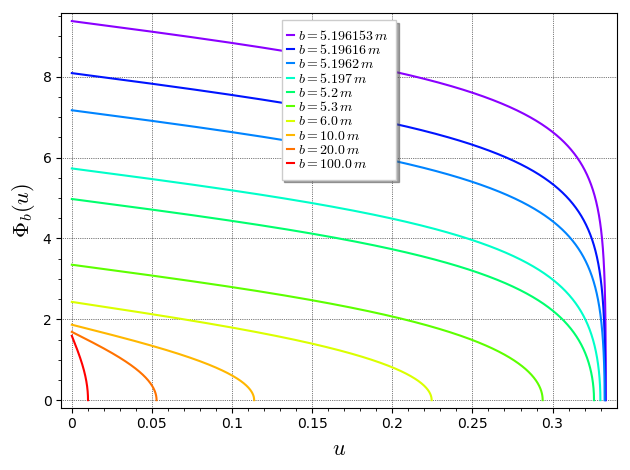

In [5]:
bc = 3*sqrt(3)
g = Graphics()
b_list = [5.196153, 5.19616, 5.1962, 5.197, 5.2, 5.3, 6, 10, 20, 100]
bmin = b_list[0]
bmax = b_list[-1]
for b1 in b_list:
    g += plot(lambda u: Phi(u, b1), (0, u_p(b1)),
              legend_label=r"$b={}\, m$".format(float(b1)), 
              thickness=1.5, color=hue(1 - log((b1 - bc)/(bmax - bc))/25),
              axes_labels=[r'$u$', r'$\Phi_b(u)$'], 
              frame=True, gridlines=True, axes=False)
show(g, legend_loc='upper center')

In [6]:
g.save("gis_Phib_b_gt_bc.pdf", legend_loc='upper center')

## Case $b < b_{\rm c}$

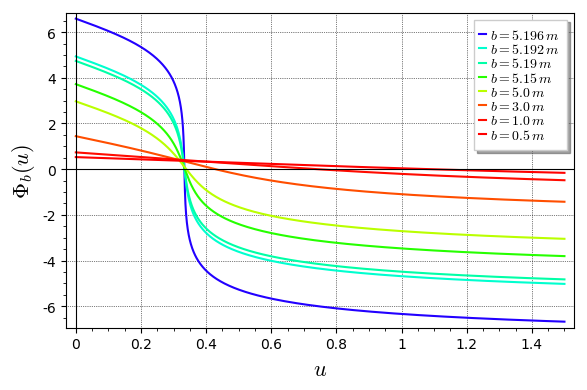

In [7]:
g = Graphics()
b_list = [5.196, 5.192, 5.19, 5.15, 5, 3, 1, 1/2]
bmin = b_list[0]
bmax = b_list[-1]
for b1 in b_list:
    g += plot(lambda u: Phi(u, b1), (0, 1.5),
              legend_label=r"$b={}\, m$".format(float(b1)), 
              thickness=1.5, color=hue(1 - log((b1 - bc)/(bmax - bc))/15),
              axes_labels=[r'$u$', r'$\Phi_b(u)$'], 
              frame=True, gridlines=True, axes=True)
g

In [8]:
g.save("gis_Phib_b_lt_bc.pdf")